<a href="https://colab.research.google.com/github/Ihbar1/ihbar.github.io/blob/main/sistem_rekomendasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
df_cbeskul = pd.read_excel('CLEAN_Content_dataset.xlsx')

In [93]:
df_cbeskul

,Nama,Asal Sekolah,Sulit Memilih,Gender,Agama,Jurusan,Bidang Ekstrakurikuler,Pekerjaan Ibu,Pekerjaan Bapak,Sungguh Berkegiatan,Minat Bakat Tersalurkan,Alasan Memilih,Teman Berpengaruh,Lama Pertemuan,Banyak Pertemuan,Minat Bakat
0,Siswa01,SMA Negeri 5 Sukabumi,Tidak,Laki-laki,Islam,IPS,Kesenian,Ibu Rumah Tangga,Wiraswasta,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
1,Siswa02,SMA Negeri 5 Sukabumi,Tidak,Laki-laki,Islam,IPS,Olahraga,Ibu Rumah Tangga,Wiraswasta,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
2,Siswa03,SMA Negeri 1 Kota Sukabumi,Tidak,Perempuan,Islam,IPA,Akademik & Kebahasaan,Ibu rumah tangga,PNS,Ya,Ya,Tekad dari diri sendiri,Ya,1 Jam,1 Kali Seminggu,"Menggemari kegiatan yang melibatkan tulisan, M..."
3,Siswa04,SMAN 1CIBADAK,Tidak,Perempuan,Islam,IPA,Olahraga,PNS,PNS,Ya,Ya,Tekad dari diri sendiri,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...
4,Siswa05,SMAN 1CIBADAK,Tidak,Perempuan,Islam,IPA,Kesenian,PNS,PNS,Ya,Ya,Tekad dari diri sendiri,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Siswa489,SMA 4 Bogor,Ya,Perempuan,Islam,IPA,Kesenian,IRT,PNS,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,1 Kali Seminggu,Menyukai dan memiliki kemampuan dalam bermain ...
489,Siswa490,SMA 19 Bandung,Ya,Laki-laki,Kristen Protestan,IPA,Bela Negara,IRT,PNS,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,1 Kali Seminggu,"Gemar memikirkan cita-cita yang ingin digapai,..."
490,Siswa491,SMA 4 Bogor,Ya,Laki-laki,Islam,IPA,Olahraga,Pegawai Negeri,Karyawan Swasta,Ya,Ya,Dorongan dari orang tua,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"Menyukai kegiatan olah tubuh, Menyukai kegiata..."
491,Siswa492,SMA 10 Bandung,Tidak,Laki-laki,Islam,IPA,Olahraga,IRT,Karyawan,Ya,Ya,Pengaruh Teman,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Memahami sisi positif maupun negatif yang ada ...


In [94]:
print('Banyak data: ', len(df_cbeskul.Nama.unique()))
print('Jenis Bidang Esktrakurikuler: ', df_cbeskul['Bidang Ekstrakurikuler'].unique())
print('Agama: ', df_cbeskul['Agama'].unique())
print('Jurusan: ', df_cbeskul['Jurusan'].unique())


Banyak data:  493
Jenis Bidang Esktrakurikuler:  ['Kesenian' 'Olahraga' 'Akademik & Kebahasaan' 'Bela Negara' 'IT'
 'Lingkungan Hidup']
Agama:  ['Islam' 'Kristen Protestan' 'Kristen Katolik']
Jurusan:  ['IPS' 'IPA' 'Bahasa']


In [95]:
import matplotlib.pyplot as plt

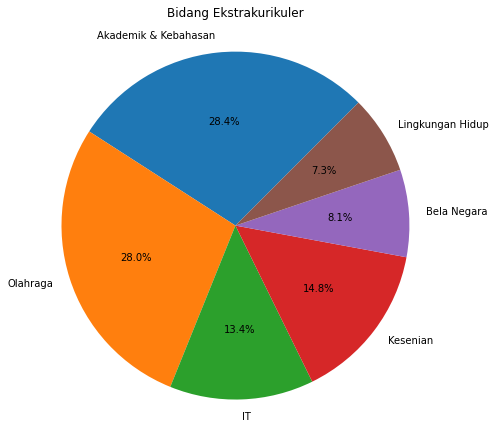

In [96]:

value_count_bidang = df_cbeskul['Bidang Ekstrakurikuler'].value_counts()
fig, ax = plt.subplots()
ax.pie([value_count_bidang['Akademik & Kebahasaan'],
value_count_bidang['Olahraga'],
value_count_bidang['IT'],
value_count_bidang['Kesenian'],
value_count_bidang['Bela Negara'],
value_count_bidang['Lingkungan Hidup']],
labels=['Akademik & Kebahasan','Olahraga', 'IT','Kesenian', 'Bela Negara','Lingkungan Hidup'],
autopct='%1.1f%%', startangle=45, radius=2)
ax.set_title("Bidang Ekstrakurikuler", pad=100)
plt.show()

In [97]:
df_cbeskul = df_cbeskul[['Nama','Bidang Ekstrakurikuler', 'Gender',
'Jurusan','Teman Berpengaruh', 'Lama Pertemuan','Banyak Pertemuan','Minat Bakat']]
df_cbeskul.head()

,Nama,Bidang Ekstrakurikuler,Gender,Jurusan,Teman Berpengaruh,Lama Pertemuan,Banyak Pertemuan,Minat Bakat
0,Siswa01,Kesenian,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
1,Siswa02,Olahraga,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
2,Siswa03,Akademik & Kebahasaan,Perempuan,IPA,Ya,1 Jam,1 Kali Seminggu,"Menggemari kegiatan yang melibatkan tulisan, M..."
3,Siswa04,Olahraga,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...
4,Siswa05,Kesenian,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...


In [98]:
# value_count_bidang = df_cbeskul['Agama'].value_counts()
# fig, ax = plt.subplots()
# ax.pie([value_count_bidang['Islam'],
# value_count_bidang['Kristen Protestan'],
# value_count_bidang['Kisten Katolik']],
# labels=['Islam','Kristen Protestan','Kristen Katolik'],
# autopct='%1.1f%%', startangle=45, radius=2)
# ax.set_title("Agama", pad=100)
# plt.show()

In [99]:
df_cbeskul = df_cbeskul[['Nama','Bidang Ekstrakurikuler', 'Gender','Jurusan','Teman Berpengaruh', 'Lama Pertemuan','Banyak Pertemuan','Minat Bakat']]
df_cbeskul.head()

,Nama,Bidang Ekstrakurikuler,Gender,Jurusan,Teman Berpengaruh,Lama Pertemuan,Banyak Pertemuan,Minat Bakat
0,Siswa01,Kesenian,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
1,Siswa02,Olahraga,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
2,Siswa03,Akademik & Kebahasaan,Perempuan,IPA,Ya,1 Jam,1 Kali Seminggu,"Menggemari kegiatan yang melibatkan tulisan, M..."
3,Siswa04,Olahraga,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...
4,Siswa05,Kesenian,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...


In [100]:
df_cbeskul.isnull().sum()

Nama                      0
Bidang Ekstrakurikuler    0
Gender                    0
Jurusan                   0
Teman Berpengaruh         0
Lama Pertemuan            0
Banyak Pertemuan          0
Minat Bakat               0
dtype: int64

In [101]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [102]:
!pip install rake-nltk
from rake_nltk import Rake
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [103]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
df_cbeskul.set_index('Nama', inplace = True)
df_cbeskul.head()

,Bidang Ekstrakurikuler,Gender,Jurusan,Teman Berpengaruh,Lama Pertemuan,Banyak Pertemuan,Minat Bakat
Nama,,,,,,,
Siswa01,Kesenian,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
Siswa02,Olahraga,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
Siswa03,Akademik & Kebahasaan,Perempuan,IPA,Ya,1 Jam,1 Kali Seminggu,"Menggemari kegiatan yang melibatkan tulisan, M..."
Siswa04,Olahraga,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...
Siswa05,Kesenian,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...


In [105]:
df_cbeskul['Key_words'] = ""
for index, row in df_cbeskul.iterrows():
    plot = row['Minat Bakat']
    r = Rake()
    
    r.extract_keywords_from_text(plot)
    
    key_words_dict_scores = r.get_word_degrees()
    
    row['Key_words'] = list(key_words_dict_scores.keys())
# dropping the Plot column
df_cbeskul.drop(columns = ['Minat Bakat'], inplace = True)
df_cbeskul.head()

,Bidang Ekstrakurikuler,Gender,Jurusan,Teman Berpengaruh,Lama Pertemuan,Banyak Pertemuan,Key_words
Nama,,,,,,,
Siswa01,Kesenian,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"[cenderung, menyukai, untuk, bekerja, secara, ..."
Siswa02,Olahraga,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"[cenderung, menyukai, untuk, bekerja, secara, ..."
Siswa03,Akademik & Kebahasaan,Perempuan,IPA,Ya,1 Jam,1 Kali Seminggu,"[menggemari, kegiatan, yang, melibatkan, tulis..."
Siswa04,Olahraga,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,"[mempertimbangkan, baik, sisi, plus, ataupun, ..."
Siswa05,Kesenian,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,"[mempertimbangkan, baik, sisi, plus, ataupun, ..."


In [106]:
list_stopwords = set(stopwords.words('indonesian'))
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
    
df_cbeskul['Key_words'] = df_cbeskul['Key_words'].apply(stopwords_removal)
df_cbeskul

,Bidang Ekstrakurikuler,Gender,Jurusan,Teman Berpengaruh,Lama Pertemuan,Banyak Pertemuan,Key_words
Nama,,,,,,,
Siswa01,Kesenian,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"[cenderung, menyukai, berkelompok, memiliki, k..."
Siswa02,Olahraga,Laki-laki,IPS,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"[cenderung, menyukai, berkelompok, memiliki, k..."
Siswa03,Akademik & Kebahasaan,Perempuan,IPA,Ya,1 Jam,1 Kali Seminggu,"[menggemari, kegiatan, melibatkan, tulisan, me..."
Siswa04,Olahraga,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,"[mempertimbangkan, sisi, plus, minus, keputusa..."
Siswa05,Kesenian,Perempuan,IPA,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,"[mempertimbangkan, sisi, plus, minus, keputusa..."
...,...,...,...,...,...,...,...
Siswa489,Kesenian,Perempuan,IPA,Ya,Lebih dari 1 Jam,1 Kali Seminggu,"[menyukai, memiliki, kemampuan, bermain, alat,..."
Siswa490,Bela Negara,Laki-laki,IPA,Ya,Lebih dari 1 Jam,1 Kali Seminggu,"[gemar, memikirkan, cita, digapai, mempertimba..."
Siswa491,Olahraga,Laki-laki,IPA,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"[menyukai, kegiatan, olah, tubuh, outdoor, pra..."


In [107]:
df_cbeskul['bag_of_words'] = ''
columns = df_cbeskul.columns
for index, row in df_cbeskul.iterrows():
    words = ''
    for col in columns:
      if col == 'Key_words':
          words = words + ' '.join(row[col])+ ' '
      else:
          words = words + row[col]+ ' '
row['bag_of_words'] = words    
df_cbeskul.drop(columns = [col for col in df_cbeskul.columns if col!= 'bag_of_words'], inplace = True)
df_cbeskul.head()

,bag_of_words
Nama,
Siswa01,
Siswa02,
Siswa03,
Siswa04,
Siswa05,


In [108]:
count = CountVectorizer()
count_matrix = count.fit_transform(df_cbeskul['bag_of_words'])

In [109]:
count.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['alat',
 'bermain',
 'dunia',
 'gemar',
 'instumen',
 'ips',
 'irama',
 'jam',
 'kali',
 'kedalam',
 'kemampuan',
 'kesenian',
 'lagu',
 'melodi',
 'memiliki',
 'menari',
 'mencintai',
 'mendefinisikan',
 'mendendangkan',
 'menuangkannya',
 'menyukai',
 'merangkai',
 'meresapi',
 'mudah',
 'musik',
 'nada',
 'peran',
 'perempuan',
 'seminggu',
 'seni',
 'suara',
 'tarik',
 'ya']

In [110]:
cv_count = pd.DataFrame(count_matrix.toarray())
cv_count

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
cosine_sim = cosine_similarity(count_matrix)
cosine_sim


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [112]:
indices = pd.Series(df_cbeskul.index)

def recommendations(nama, cosine_sim = cosine_sim):
    recommended = []

    idx = indices[indices == nama].index[0]

    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    
    top_indexes = list(score_series.iloc[1:2].index)

    for i in top_indexes:
      recommended.append(list(df_cbeskul['bag_of_words'])[i])
    return recommended